In [1]:
#%pylab inline

import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow_datasets as tfds
#  Important !!!! path to shared tensorflow dataset
eagle_dir='/storage/scratch/mhuertas/data/sfh/tensorflow_datasets/eagle'
tng_dir='/storage/scratch/mhuertas/data/sfh/tensorflow_datasets/tng100'

#data_dir ='/scratch/mhuertas/tensorflow_datasets/eagle'

# Load Datasets

In [2]:
from sfh.datasets.eagle import eagle
from sfh.datasets.tng100 import tng100

In [48]:
dset_eagle = tfds.load('eagle', split='train', data_dir=eagle_dir)
dset_tng = tfds.load('tng100', split='train', data_dir=tng_dir)

# Plot some examples 

Train 7314


2022-04-14 20:13:48.744092: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-04-14 20:13:48.878607: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


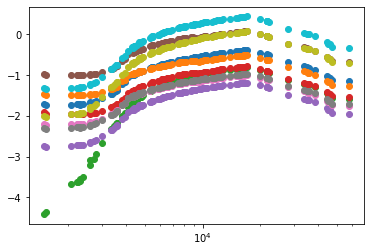

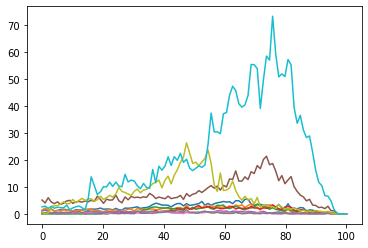

In [51]:
import matplotlib.pyplot as plt
import numpy as np
print("Train",len(dset_eagle))

fig, axs = plt.subplots(1, 1)
for example in dset_eagle.take(10):
    #print((example['wl_sort'])[example['inds_valid']])
    time_vec = example['time']
    inds_valid = example['inds_valid']
    axs.scatter((example['wl_sort'])[example['inds_valid']],np.log10(example['sed']))
    axs.set_xscale('log')

fig, axs = plt.subplots(1, 1)
for example in dset_eagle.take(10):
    #print(wl[example['inds_valid']])
    axs.plot(example['time'],example['SFR_Max'])
    #axs.set_xscale('log')    
    #sed = (tf.gather(example['sed'],inds, axis=1) + 20.70243)/2.0466275

Train 12326
tf.Tensor(
[ 1498.5  1535.1  2057.9  2226.5  2246.9  2297.7  2300.7  2372.5  2582.5
  2601.   2710.1  2797.1  2994.3  3355.1  3359.2  3478.5  3556.5  3584.7
  3602.5  3828.   3924.4  4107.9  4311.7  4318.1  4326.5  4370.9  4418.6
  4433.5  4448.   4555.6  4665.3  4702.5  4744.3  4753.2  4760.9  4773.7
  4800.9  4810.   4869.9  5308.2  5359.5  5438.9  5459.   5470.2  5477.5
  5536.1  5887.4  5912.4  5996.8  6170.   6175.6  6244.9  6275.5  6310.5
  6362.6  6564.6  6576.9  6616.   6781.4  6936.4  7489.9  7520.   7648.5
  7671.3  7675.7  7693.3  7750.1  7891.1  7985.6  8012.3  8029.5  8059.6
  8166.   8660.   8826.3  8871.7  8946.8  9006.2  9054.5  9096.4  9129.
  9153.7  9168.9  9620.   9862.9  9907.8 10209.8 10314.1 10459.4 10550.7
 11248.6 11485.  11534.4 11945.1 12387.7 12486.1 12500.9 12524.7 12776.9
 13923.9 14983.9 15370.8 15600.8 16060.4 16359.1 16430.6 16488.9 17063.3
 19858.2 21524.7 21621.6 21635.6 21684.6 22084.  27759.2 33682.1 34799.8
 35511.  35569.7 38275.  4433

2022-04-14 20:14:08.972514: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


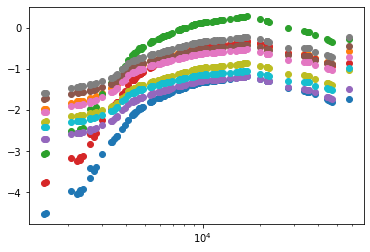

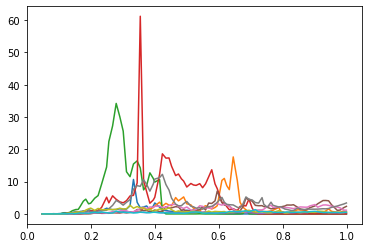

In [52]:
import matplotlib.pyplot as plt
print("Train",len(dset_tng))

fig, axs = plt.subplots(1, 1)
for example_tng, example_eagle in zip(dset_tng.take(10),dset_eagle.take(10)):
    #print(wl[example['inds_valid']])
    #print(wl_tng)
    #print(example['sed'])
    print((example_tng['wl_sort'])[example_eagle['inds_valid']])
    axs.scatter((example_tng['wl_sort'])[example_eagle['inds_valid']],np.log10((example_tng['sed'])[example_eagle['inds_valid']]))
    axs.set_xscale('log')

fig, axs = plt.subplots(1, 1)
for example in dset_tng.take(10):
    #print(wl[example['inds_valid']])
    axs.plot(example['time'],example['SFR_Max'])
    #axs.set_xscale('log')    
    #sed = (tf.gather(example['sed'],inds, axis=1) + 20.70243)/2.0466275

# Define datasets for TNG and EAGLE

In [6]:
def preprocessing(example):
    return tf.reshape(example['SFR_Max'],(-1,100,1)), \
           tf.reshape(example['SFR_Max'],(-1,100,1))

def preprocessing_wmass(example):
    mass = example['Mstar'][:,0]
    mass_half = example['Mstar_Half'][:,0]
    tiler = tf.constant([100])
    mass = tf.reshape(tf.tile(mass, tiler),(-1,100,1))
    mass_half = tf.reshape(tf.tile(mass_half, tiler),(-1,100,1))
    sfr = tf.math.add(tf.reshape(example['SFR_Max'],(-1,100,1)), 1e-5)
    res = tf.concat([sfr, mass, mass_half], axis=2)
    return res, res

def preprocessing_wmass_atan(example):
    mass = example['Mstar'][:,0]
    #mass_half = example['Mstar_Half'][:,0]
    #sed = (tf.gather(example['sed'],inds, axis=1) + 20.70243)/2.0466275
    sed = example['sed']
    tiler = tf.constant([100])
    mass = tf.reshape(tf.tile(mass, tiler),(-1,100,1))
    #mass_half = tf.reshape(tf.tile(mass_half, tiler),(-1,100,1))
    sfr = tf.math.tanh(tf.math.asinh(tf.reshape(example['SFR_Max'],(-1,100,1))/40) + 1e-3 + 0.005*tf.math.softplus(tf.random.normal(shape=[64,100,1])))
    res = tf.concat([sfr], axis=2) #  mass, mass_half
    return (res, sed), res

def input_fn(mode='train', batch_size=64, 
             dataset_name='tng100', data_dir=None,
             include_mass=True, arctan=True):
    """
    mode: 'train' or 'test'
    """
    keys = ['sed','Mstar', 'SFR_Max', 'mass_quantiles', 'sed', 'time']
    if mode == 'train':
        dataset = tfds.load(dataset_name, split='train[:90%]', data_dir=data_dir)
        dataset = dataset.map(lambda x: {k:x[k] for k in keys})
        dataset = dataset.repeat()
        dataset = dataset.shuffle(10000)
    else:
        dataset = tfds.load(dataset_name, split='train[90%:]', data_dir=data_dir)
        dataset = dataset.map(lambda x: {k:x[k] for k in keys}) #dataset = dataset.repeat()
        
    dataset = dataset.batch(batch_size, drop_remainder=True)
    if include_mass and arctan:
        dataset = dataset.map(preprocessing_wmass_atan) # Apply data preprocessing
    elif include_mass:
        dataset = dataset.map(preprocessing_wmass)
    else : 
        dataset = dataset.map(preprocessing)
    dataset = dataset.prefetch(-1)       # fetch next batches while training current one (-1 for autotune)
    return dataset

In [7]:
def preprocessing(example):
    return tf.reshape(example['SFR_Max'],(-1,100,1)), \
           tf.reshape(example['SFR_Max'],(-1,100,1))

def preprocessing_wmass(example):
    mass = example['Mstar'][:,0]
    mass_half = example['Mstar_Half'][:,0]
    tiler = tf.constant([100])
    mass = tf.reshape(tf.tile(mass, tiler),(-1,100,1))
    mass_half = tf.reshape(tf.tile(mass_half, tiler),(-1,100,1))
    sfr = tf.math.add(tf.reshape(example['SFR_Max'],(-1,100,1)), 1e-5)
    res = tf.concat([sfr, mass, mass_half], axis=2)
    return res, res

def preprocessing_wmass_atan_tng(example):
    mass = example['Mstar'][:,0]
    #mass_half = example['Mstar_Half'][:,0]
    sed = (tf.gather(example['sed'],np.squeeze(np.where(inds_valid)), axis=1))
    #sed = example['sed']
    tiler = tf.constant([100])
    mass = tf.reshape(tf.tile(mass, tiler),(-1,100,1))
    #mass_half = tf.reshape(tf.tile(mass_half, tiler),(-1,100,1))
    sfr = tf.math.tanh(tf.math.asinh(tf.reshape(example['SFR_Max'],(-1,100,1))/40) + 1e-3 + 0.005*tf.math.softplus(tf.random.normal(shape=[64,100,1])))
    res = tf.concat([sfr], axis=2) #  mass, mass_half
    return (res, sed), res

def input_fn_tng(mode='train', batch_size=64, 
             dataset_name='tng100', data_dir=None,
             include_mass=True, arctan=True):
    """
    mode: 'train' or 'test'
    """
    keys = ['sed','Mstar', 'SFR_Max', 'mass_quantiles', 'sed', 'time']
    if mode == 'train':
        dataset = tfds.load(dataset_name, split='train[:90%]', data_dir=data_dir)
        dataset = dataset.map(lambda x: {k:x[k] for k in keys})
        dataset = dataset.repeat()
        dataset = dataset.shuffle(10000)
    else:
        dataset = tfds.load(dataset_name, split='train[90%:]', data_dir=data_dir)
        dataset = dataset.map(lambda x: {k:x[k] for k in keys}) #dataset = dataset.repeat()
        
    dataset = dataset.batch(batch_size, drop_remainder=True)
    if include_mass and arctan:
        dataset = dataset.map(preprocessing_wmass_atan_tng) # Apply data preprocessing
    elif include_mass:
        dataset = dataset.map(preprocessing_wmass)
    else : 
        dataset = dataset.map(preprocessing)
    dataset = dataset.prefetch(-1)       # fetch next batches while training current one (-1 for autotune)
    return dataset

In [8]:
batch_size = 64
epochs = 10

dtrain_eagle = input_fn(mode='train', batch_size=batch_size, dataset_name='eagle',data_dir=eagle_dir)
dval_eagle = input_fn(mode='val', batch_size=batch_size, dataset_name='eagle',data_dir=eagle_dir)

In [9]:
batch_size = 64
epochs = 10

dtrain_tng = input_fn_tng(mode='train', batch_size=batch_size, dataset_name='tng100',data_dir=tng_dir)
dval_tng = input_fn_tng(mode='val', batch_size=batch_size, dataset_name='tng100',data_dir=tng_dir)

# Train on TNG100

In [10]:
""""Keras model implementing PixelCNN."""

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
import sys
import time
tfd = tfp.distributions
tfb = tfp.bijectors
tfkl=keras.layers

def generate_model(n_timesteps, n_filters, *, n_channels=1, n_components=2, kernel_size=3,
                   n_dilations=5, list_of_dilation_rates=None,
                   list_of_filters=None):
    """Generate the PixelCNN Keras model.

    Parameters
    ----------
    n_timesteps : int
        Number of time steps.
    n_filters : int
        Number of filters.
    n_channels : int, default 1
        Number of channels in the dataset
    n_components : int, default 2
        Number of components in the Gaussian mixture distribution.
    kernel_size : int, default 3
        Size of the convolution kernel.
    n_dilations : int, default 5
        Number of dilated convolutions to do. For each convolution, the
        dilation rate is 2**idx+1 and the number of filters is 2**idx+4.
    list_of_dilation_rates : list of int or None, default None
        List of the dilation rates to use in the dilated convolutions. If not
        None, the n_dilations is not used and filters must be given with the
        same size.
    list_of_filters : list of int or None, default None
        List of the filter number for each of the dilated convolutions. Must be
        of the same size as list_of_dilation_rates

    Returns
    -------
    Keras model

    """
    # Shape of the distribution
    event_shape = [1]
    # Compute how many parameters this distribution requires
    params_size = 2
    #print(params_size)

    
    input_sfh = keras.layers.Input(shape=(n_timesteps,1))
    input_sed = keras.layers.Input(shape=(n_filters,1))
    
    # Compress the SED and return some channels
    sed_net = tf.keras.Sequential([
        tfkl.Input(shape=(125, 1)),
        tfkl.Conv1D(16, 3, strides=2, padding='same', activation='relu'),
        tfkl.Conv1D(32, 3, strides=2, padding='same', activation='relu'),
        tfkl.Conv1D(64, 3, strides=2, padding='same', activation='relu'),
        tfkl.Conv1D(64, 3, strides=1, padding='same', activation='relu'),
        tfkl.Flatten(),
        tfkl.Dense(128, activation='relu'),
        tfkl.Dense(8, activation='softplus'),
        tfkl.Lambda(lambda x: tf.tile(tf.reshape(x,[-1,1,8]), [1,100,1]))
        ])
    
    merged = keras.layers.Concatenate(axis=-1)([input_sfh, 
                                                sed_net(input_sed)])
    
    
    # Shift and cut
    net = keras.layers.Lambda(
            lambda x: tf.pad(x, paddings=tf.constant([[0, 0], [1, 0], [0, 0]]))
        )(merged)
    
    net=keras.layers.Lambda(
            lambda x: x[:, :-1, :]
        )(net)
    

    net=keras.layers.Conv1D(
            filters=16,
            kernel_size=kernel_size,
            dilation_rate=1,
            padding='causal',
            activation='relu'
        )(net)

    if list_of_dilation_rates is None:
        list_of_dilation_rates = [2**(i+1) for i in range(n_dilations)]
        list_of_filters = [2**(i+4) for i in range(n_dilations)]
    elif len(list_of_filters) != len(list_of_dilation_rates):
        raise ValueError(
            "filters and list_of_dilation_rates must have the same length")

    for dilation_rate, nb_filters in zip(list_of_dilation_rates,
                                         list_of_filters):
        net = keras.layers.Conv1D(
                filters=nb_filters,
                kernel_size=kernel_size,
                dilation_rate=dilation_rate,
                padding='causal',
                activation='relu')(net)
    
    net = keras.layers.Dense(2)(net)
    
    net = tfp.layers.DistributionLambda(
                    make_distribution_fn=lambda t: tfd.Beta(
                          concentration1=tf.math.softplus(t[..., 0])+1e-3,
                          concentration0=tf.math.softplus(t[..., 1])+1e-3)
                    )(net)
    
    pixel_cnn = keras.models.Model(inputs=[input_sfh, input_sed],
                                  outputs=net)

    # Use the negative log-likelihood as loss function.
    def negloglik(y, q):
        return tf.reduce_sum(-q.log_prob(y[...,0]), -1)
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.0002)
    pixel_cnn.compile(loss=negloglik, optimizer=opt)

    return pixel_cnn

In [11]:
pixel_cnn = generate_model(100,125)

pixel_cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 125, 1)]     0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 sequential (Sequential)        (None, 100, 8)       152424      ['input_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 100, 9)       0           ['input_1[0][0]',                
                                                                  'sequential[0][0]']         

2022-04-14 19:51:03.866534: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [12]:
hist = pixel_cnn.fit(dtrain_tng, 
                     epochs=epochs,
                     steps_per_epoch=1000,validation_data=dval_tng)

Epoch 1/10


2022-04-14 19:51:08.670488: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204


 997/1000 [============================>.] - ETA: 0s - loss: -258.0215WARNING:tensorflow:@custom_gradient grad_fn has 'variables' in signature, but no ResourceVariables were used on the forward pass.


1000/1000 [==============================] - 19s 13ms/step - loss: -258.1447 - val_loss: -291.7131
Epoch 2/10
1000/1000 [==============================] - 12s 12ms/step - loss: -304.8323 - val_loss: -311.9219
Epoch 3/10
1000/1000 [==============================] - 12s 12ms/step - loss: -321.4039 - val_loss: -326.6622
Epoch 4/10
1000/1000 [==============================] - 12s 12ms/step - loss: -330.7686 - val_loss: -333.2829
Epoch 5/10
1000/1000 [==============================] - 12s 12ms/step - loss: -335.9297 - val_loss: -335.8009
Epoch 6/10
1000/1000 [==============================] - 12s 12ms/step - loss: -338.9247 - val_loss: -338.9370
Epoch 7/10
1000/1000 [==============================] - 12s 12ms/step - loss: -341.0443 - val_loss: -340.8273
Epoch 8/10
1000/1000 [==============================] - 12s 12ms/step - loss: -342.3737 - val_loss: -342.2327
Epoch 9/10
1000/1000 [==============================] - 12s 12ms/step - loss: -343.2210 - val_loss: -342.6596
Epoch 10/10
1000/1000

# Test on TNG100

In [13]:
dset_test = dval_tng.as_numpy_iterator()

In [14]:
data = next(dset_test)

In [15]:
ind=15
sample = np.zeros([64,100,1])
true = data[0][0][ind,:,0]
sed = data[0][1][ind].reshape([1,125,1]).repeat(64,axis=0)
# init at the 
sample[:,0,0] = true[0]

In [16]:
for i in range(99):
    tmp = pixel_cnn((sample, sed)).sample()
    sample[:,i+1,0] = tmp[:,i+1]

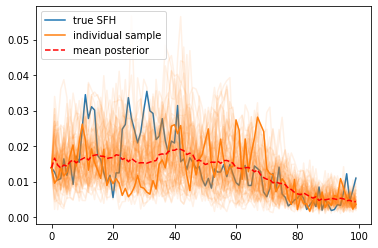

In [17]:
plt.plot(true,label='true SFH')
for i in range(64):
    plt.plot(sample[i,:,0],color='C1',alpha=0.1)
plt.plot(sample[1,:,0],color='C1',alpha=1.,label='individual sample')    
plt.plot(sample.mean(axis=0)[:,0],'--',color='red',label='mean posterior')
plt.legend(loc='upper left')

# check summaries

In [18]:
import pdb
def find_summaries(mass, time, percentiles=np.linspace(0.1, 0.9, 9)):

    ''' compute the half mass and the half time of a galaxy 
          Input: 
                - mass: array. The mass history of the galaxy.
                - time: array. The corresponding time for the galaxy history.
                - percentiles: array. The summaries you want to predict by default 0.1, 0.2,..., 0.9. 
          Output: the time of the summaries, the corresponding masses, and the index of the mass/time summary.
    '''

    summary_masses = []
    summary_times = []
    summary_indices = []
    for percentile in percentiles:
        summary_mass = min(mass, key=lambda x: abs(x-mass[0]*percentile))  # find mass closest to the half mass
        #pdb.set_trace()
        summary_masses.append(summary_mass)
        summary_mass_indices = np.where(mass == summary_mass)[0]  # find the corresponding indices
        summary_mass_index = summary_mass_indices[0]  # chose the first index for the half mass
        summary_indices.append(summary_mass_index)
        summary_time = time[summary_mass_index]  # find the corresponding half time
        summary_times.append(summary_time)

    return np.array(summary_times).astype('float32')

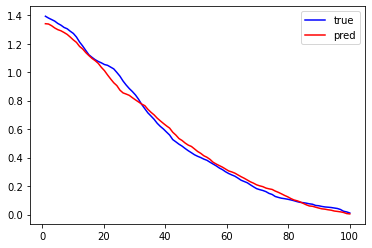

In [19]:
#time = (tbins[1:] + tbins[:-1] )/2.
deltat=time_vec[1:] - time_vec[:-1]
#print(deltat)
mgrowth_true = np.cumsum(deltat*np.flip(true[1:]))
mgrowth_pred = np.cumsum(deltat*np.flip(sample[18,1:,0]))

plt.plot(np.flip(time_vec[1:]),mgrowth_true,color='blue',label="true")
plt.plot(np.flip(time_vec[1:]),mgrowth_pred,color='red',label='pred')
plt.legend()

In [20]:
t50_pred=[]
t50_true=[]
for j in range(1):
    try:
        data = next(dset_test)
        for ind in range(64):
            sample = np.zeros([64,100,1])
            true = data[0][0][ind,:,0]
            sed = data[0][1][ind].reshape([1,125,1]).repeat(64,axis=0)
            # init at the 
            sample[:,0,0] = true[0]
            for i in range(99):
                tmp = pixel_cnn((sample, sed)).sample()
                sample[:,i+1,0] = tmp[:,i+1]
            mgrowth_true = np.cumsum(deltat*np.flip(true[1:]))
            mgrowth_pred = np.cumsum(deltat*np.flip(sample[18,1:,0]))
            #pdb.set_trace()
            summ_true = find_summaries(np.flip(mgrowth_true), np.flip(time_vec))
            summ_pred = find_summaries(np.flip(mgrowth_pred), np.flip(time_vec))
            t50_true.append(summ_true[4])
            t50_pred.append(summ_pred[4])
    except:
        break
        
            

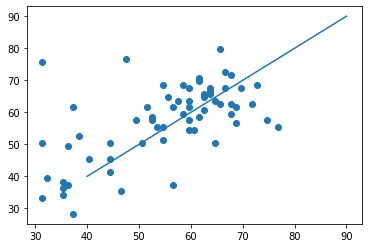

In [21]:
plt.scatter(t50_true,t50_pred)
plt.plot(np.linspace(40,90,100),np.linspace(40,90,100))

# Test on EAGLE

In [22]:
dset_eagle = dval_eagle.as_numpy_iterator()

In [23]:
data = next(dset_eagle)

In [24]:
ind=19
sample = np.zeros([64,100,1])
true = data[0][0][ind,:,0]
sed = data[0][1][ind].reshape([1,125,1]).repeat(64,axis=0)
# init at the 
sample[:,0,0] = true[0]

In [25]:
for i in range(99):
    tmp = pixel_cnn((sample, sed)).sample()
    sample[:,i+1,0] = tmp[:,i+1]

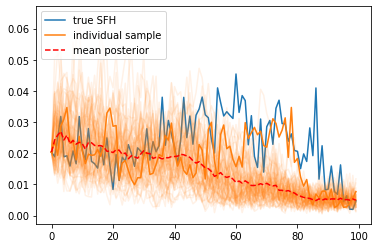

In [26]:
plt.plot(true,label='true SFH')
for i in range(64):
    plt.plot(sample[i,:,0],color='C1',alpha=0.1)
plt.plot(sample[1,:,0],color='C1',alpha=1.,label='individual sample')    
plt.plot(sample.mean(axis=0)[:,0],'--',color='red',label='mean posterior')
plt.legend(loc='upper left')

# check summaries

In [27]:
t = (time_vec[1:] + time_vec[:-1] )/2.
print(t.shape)
print(t)
print(true.shape)
deltat=time_vec[1:] - time_vec[:-1]
print(deltat)

(99,)
tf.Tensor(
[ 0.5050505  1.5151515  2.5252523  3.5353534  4.5454545  5.5555553
  6.5656567  7.575757   8.585858   9.59596   10.60606   11.616161
 12.626263  13.636364  14.646464  15.656565  16.666666  17.676767
 18.686869  19.69697   20.707071  21.71717   22.727272  23.737373
 24.747475  25.757576  26.767677  27.777779  28.787878  29.79798
 30.80808   31.81818   32.82828   33.838383  34.848484  35.858585
 36.868687  37.878788  38.88889   39.89899   40.909092  41.919193
 42.929295  43.939392  44.949493  45.959595  46.969696  47.979797
 48.9899    50.        51.0101    52.020203  53.030304  54.040405
 55.050507  56.060608  57.070705  58.080807  59.090908  60.10101
 61.11111   62.121212  63.131313  64.14141   65.15151   66.16161
 67.171715  68.181816  69.19192   70.20202   71.21212   72.22222
 73.23232   74.242424  75.252525  76.26263   77.27273   78.28283
 79.29293   80.30303   81.31313   82.323235  83.333336  84.34344
 85.35354   86.36364   87.37373   88.383835  89.393936  90.40404

tf.Tensor(
[1.010101  1.010101  1.0101011 1.0101008 1.0101013 1.0101008 1.0101008
 1.0101008 1.0101013 1.0101013 1.0101004 1.0101013 1.0101013 1.0101004
 1.0101013 1.0101004 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013
 1.0100994 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0100994
 1.0101013 1.0101013 1.0101013 1.0100994 1.0101013 1.0101013 1.0101013
 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013
 1.0101013 1.0100975 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013
 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0100975
 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013
 1.0100975 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013
 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013
 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013
 1.0101013 1.0101013 1.0100937 1.0101013 1.0101013 1.0101013 1.0101013
 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.0101013 1.010

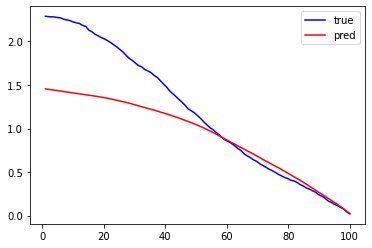

In [28]:
#time = (tbins[1:] + tbins[:-1] )/2.
deltat=time_vec[1:] - time_vec[:-1]
print(deltat)
mgrowth_true = np.cumsum(deltat*true[1:])
mgrowth_pred = np.cumsum(deltat*sample.mean(axis=0)[1:,0])

plt.plot(np.flip(time_vec[1:]),mgrowth_true,color='blue',label="true")
plt.plot(np.flip(time_vec[1:]),mgrowth_pred,color='red',label='pred')
plt.legend()

In [29]:
summ_true = find_summaries(np.flip(mgrowth_true), np.flip(time_vec))
summ_pred = find_summaries(np.flip(mgrowth_pred), np.flip(time_vec))

In [30]:
print(summ_true)
print(summ_pred)

[10.10101  23.232323 34.343433 43.434345 50.50505  57.575756 64.64646
 73.73737  82.828285]
[ 6.060606 12.121212 19.19192  26.262627 33.333332 41.414143 49.49495
 60.60606  74.747475]


In [31]:
t50_pred=[]
t50_true=[]
for j in range(1):
    try:
        data = next(dset_eagle)
        for ind in range(64):
            sample = np.zeros([64,100,1])
            true = data[0][0][ind,:,0]
            sed = data[0][1][ind].reshape([1,125,1]).repeat(64,axis=0)
            # init at the 
            sample[:,0,0] = true[0]
            for i in range(99):
                tmp = pixel_cnn((sample, sed)).sample()
                sample[:,i+1,0] = tmp[:,i+1]
            mgrowth_true = np.cumsum(deltat*np.flip(true[1:]))
            mgrowth_pred = np.cumsum(deltat*np.flip(sample[18,1:,0]))
            #pdb.set_trace()
            summ_true = find_summaries(np.flip(mgrowth_true), np.flip(time_vec))
            summ_pred = find_summaries(np.flip(mgrowth_pred), np.flip(time_vec))
            t50_true.append(summ_true[4])
            t50_pred.append(summ_pred[4])
    except:
        break
        
            

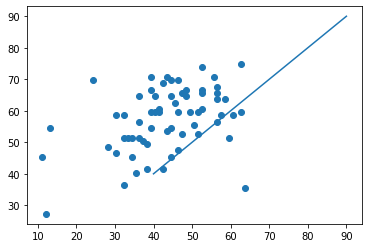

In [32]:
plt.scatter(t50_true,t50_pred)
plt.plot(np.linspace(40,90,100),np.linspace(40,90,100))


# train on Eagle

In [33]:
pixel_cnn = generate_model(100,125)

pixel_cnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 125, 1)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 sequential_1 (Sequential)      (None, 100, 8)       152424      ['input_5[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 100, 9)       0           ['input_4[0][0]',                
                                                                  'sequential_1[0][0]']     

In [34]:
hist = pixel_cnn.fit(dtrain_eagle, 
                     epochs=epochs,
                     steps_per_epoch=1000,validation_data=dval_eagle)

Epoch 1/10


 996/1000 [============================>.] - ETA: 0s - loss: -236.5974WARNING:tensorflow:@custom_gradient grad_fn has 'variables' in signature, but no ResourceVariables were used on the forward pass.


1000/1000 [==============================] - 13s 11ms/step - loss: -236.7419 - val_loss: -272.9611
Epoch 2/10
1000/1000 [==============================] - 11s 11ms/step - loss: -291.9261 - val_loss: -305.0354
Epoch 3/10
1000/1000 [==============================] - 11s 11ms/step - loss: -310.2256 - val_loss: -316.0182
Epoch 4/10
1000/1000 [==============================] - 11s 11ms/step - loss: -316.7957 - val_loss: -320.4271
Epoch 5/10
1000/1000 [==============================] - 11s 11ms/step - loss: -319.2470 - val_loss: -322.3885
Epoch 6/10
1000/1000 [==============================] - 11s 11ms/step - loss: -321.2049 - val_loss: -323.5351
Epoch 7/10
1000/1000 [==============================] - 11s 11ms/step - loss: -322.0571 - val_loss: -324.7767
Epoch 8/10
1000/1000 [==============================] - 11s 11ms/step - loss: -322.9385 - val_loss: -325.5804
Epoch 9/10
1000/1000 [==============================] - 11s 11ms/step - loss: -323.4159 - val_loss: -324.7885
Epoch 10/10
1000/1000

In [35]:
dset_eagle = dval_eagle.as_numpy_iterator()

In [42]:
data = next(dset_eagle)

In [43]:
ind=19
sample = np.zeros([64,100,1])
true = data[0][0][ind,:,0]
sed = data[0][1][ind].reshape([1,125,1]).repeat(64,axis=0)
# init at the 
sample[:,0,0] = true[0]

In [44]:
ind=19
sample = np.zeros([64,100,1])
true = data[0][0][ind,:,0]
sed = data[0][1][ind].reshape([1,125,1]).repeat(64,axis=0)
# init at the 
sample[:,0,0] = true[0]

In [45]:
for i in range(99):
    tmp = pixel_cnn((sample, sed)).sample()
    sample[:,i+1,0] = tmp[:,i+1]

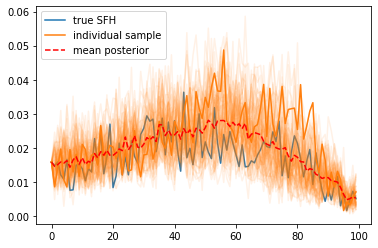

In [46]:
plt.plot(true,label='true SFH')
for i in range(64):
    plt.plot(sample[i,:,0],color='C1',alpha=0.1)
plt.plot(sample[1,:,0],color='C1',alpha=1.,label='individual sample')    
plt.plot(sample.mean(axis=0)[:,0],'--',color='red',label='mean posterior')
plt.legend(loc='upper left')

In [40]:
t50_pred=[]
t50_true=[]
for j in range(1):
    try:
        data = next(dset_eagle)
        for ind in range(64):
            sample = np.zeros([64,100,1])
            true = data[0][0][ind,:,0]
            sed = data[0][1][ind].reshape([1,125,1]).repeat(64,axis=0)
            # init at the 
            sample[:,0,0] = true[0]
            for i in range(99):
                tmp = pixel_cnn((sample, sed)).sample()
                sample[:,i+1,0] = tmp[:,i+1]
            mgrowth_true = np.cumsum(deltat*np.flip(true[1:]))
            mgrowth_pred = np.cumsum(deltat*np.flip(sample[18,1:,0]))
            #pdb.set_trace()
            summ_true = find_summaries(np.flip(mgrowth_true), np.flip(time_vec))
            summ_pred = find_summaries(np.flip(mgrowth_pred), np.flip(time_vec))
            t50_true.append(summ_true[4])
            t50_pred.append(summ_pred[4])
    except:
        break
        
            

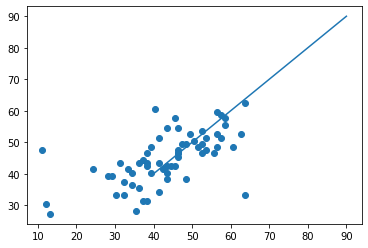

In [41]:
plt.scatter(t50_true,t50_pred)
plt.plot(np.linspace(40,90,100),np.linspace(40,90,100))
